# Nonparametric Regression
## Emre Can Açıkgöz 
### November 30, 2020

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Step1: Import Data Set

In [2]:
# Read data into memory
data_set = np.genfromtxt("data_set.csv", delimiter = ",", skip_header = 1)

# Create Training and Test Sets
X_Train = data_set[:,0][:100]
X_Test = data_set[:,0][100:133]

y_Train = data_set[:,1][:100]
y_Test = data_set[:,1][100:133]

# Get number of classes and number of samples
K = np.max(data_set[:,1])
N = data_set.shape[0]

# Step2: Learn Regressogram

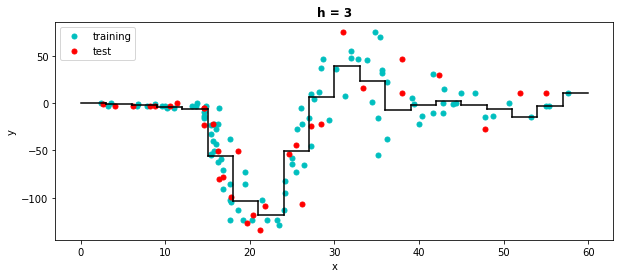

In [3]:
# Set linspace
minimum_value = 0
maximum_value = 60
data_interval = np.linspace(minimum_value, maximum_value, 1601)

# Set bin width and its ranges
bin_width = 3
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)
p_hat1 = np.asarray([np.sum(((left_borders[b] < X_Train) & (X_Train <= right_borders[b]))*y_Train) / np.sum((left_borders[b] < X_Train) & (X_Train <= right_borders[b])) for b in range(len(left_borders))])

# Plot figure
plt.figure(figsize = (10, 4))
plt.plot(X_Train, y_Train, "c.", markersize = 10, label="training")
plt.plot(X_Test, y_Test, "r.", markersize = 10, label="test")
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("h = 3", fontweight='bold')
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat1[b], p_hat1[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat1[b], p_hat1[b + 1]], "k-")    
plt.show()

# Step3: Calculate RMSE of Regressogram

In [4]:
# Find y_hat operations
index=[]
for i in range(len(X_Test)):
    for b in range(len(left_borders)):
        if (left_borders[b] < X_Test[i]) & (X_Test[i] <= right_borders[b]):
            index.append(b)
y_hat1=[]
for i in index:
    y_hat1.append(p_hat1[i])

y_hat1 = np.asarray(y_hat1)

In [5]:
# Calculate RMSE
RMSE = math.sqrt(np.mean((y_Test-y_hat1)**2))

formatted_float = "{:.4f}".format(RMSE)
print("Regressogram => RMSE is {} when h is {}".format(formatted_float, bin_width))

Regressogram => RMSE is 24.7260 when h is 3


# Step4: Learn Running Mean Smoother

### Important Note: 
Please delete the Number Operator (#) in front of the minimum_value, maximum_value and data_interval variables If you want to ged rid of the warning after plotting. It is because of some nan values. But when you delete it, our plot will be change slightly. Anyway, it is just clarification. I mentioned it in order not to loose any point from some reasons. Thank you...

<ipython-input-6-701919b798c0>:4: RuntimeWarning: invalid value encountered in double_scalars
  p_hat2 = np.asarray([np.sum((((x - 0.5 * bin_width) < X_Train) & (X_Train <= (x + 0.5 * bin_width))) * y_Train) / np.sum((((x - 0.5 * bin_width) < X_Train) & (X_Train <= (x + 0.5 * bin_width)))) for x in data_interval])


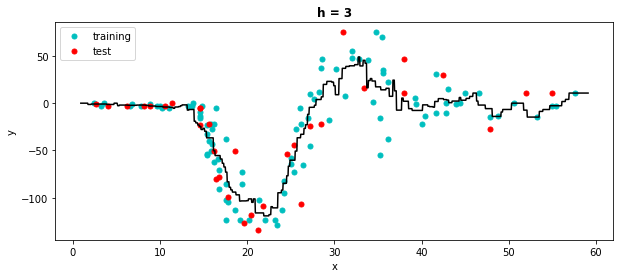

In [6]:
#minimum_value = 0.5 * bin_width
#maximum_value = max(X_Train)
#data_interval = np.linspace(minimum_value, maximum_value, 1601)
p_hat2 = np.asarray([np.sum((((x - 0.5 * bin_width) < X_Train) & (X_Train <= (x + 0.5 * bin_width))) * y_Train) / np.sum((((x - 0.5 * bin_width) < X_Train) & (X_Train <= (x + 0.5 * bin_width)))) for x in data_interval])
plt.figure(figsize = (10, 4))
plt.plot(X_Train, y_Train, "c.", markersize = 10, label="training")
plt.plot(X_Test, y_Test, "r.", markersize = 10, label="test")
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("h = 3", fontweight='bold')
plt.plot(data_interval, p_hat2, "k-")
plt.show()

# Step5: Calculate RMSE of Running Mean Smoother

In [7]:
# Calculate y_hat for X_Test data
y_hat2 = np.asarray([np.sum((((x - 0.5 * bin_width) < X_Train) & (X_Train <= (x + 0.5 * bin_width))) * y_Train) / np.sum((((x - 0.5 * bin_width) < X_Train) & (X_Train <= (x + 0.5 * bin_width)))) for x in X_Test])    

In [8]:
# Calculate RMSE
RMSE2 = math.sqrt(np.mean((y_Test-y_hat2)**2))

formatted_float2 = "{:.4f}".format(RMSE2)
print("Running Mean Smoother => RMSE is {} when h is {}".format(formatted_float2, bin_width))

Running Mean Smoother => RMSE is 23.8403 when h is 3


# Step6: Learn Kernel Smoother

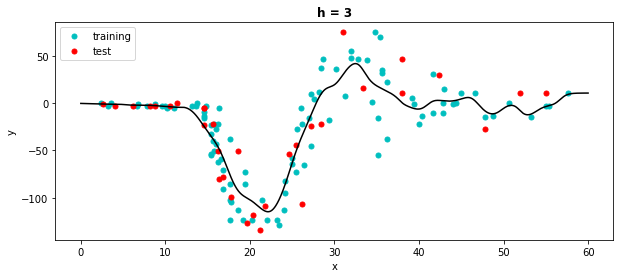

In [9]:
# Set Bin Width and Calculate discrimination function
bin_width2 = 1
p_hat3 = np.asarray([np.sum((1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - X_Train)**2 / bin_width2**2))*y_Train) / np.sum((1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - X_Train)**2 / bin_width2**2)))for x in data_interval])

#Plot figure
plt.figure(figsize = (10, 4))
plt.plot(X_Train, y_Train, "c.", markersize = 10, label="training")
plt.plot(X_Test, y_Test, "r.", markersize = 10, label="test")
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("h = 3", fontweight='bold')
plt.plot(data_interval, p_hat3, "k-")
plt.show()

# Step7: Calculate RMSE of Mean Smoother

In [10]:
# Calculate y_hat for X_Test data
y_hat3 = [np.sum((1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - X_Train)**2 / bin_width2**2))*y_Train) / np.sum((1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - X_Train)**2 / bin_width2**2)))for x in X_Test]

In [11]:
# Calculate RMSE
RMSE3 = math.sqrt(np.mean((y_Test-y_hat3)**2))

formatted_float3 = "{:.4f}".format(RMSE3)
print("Kernel Smoother => RMSE is {} when h is {}".format(formatted_float3, bin_width))

Kernel Smoother => RMSE is 24.1672 when h is 3
